# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
# importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as st
import seaborn as sns

# jupyter magic to create plots in line
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

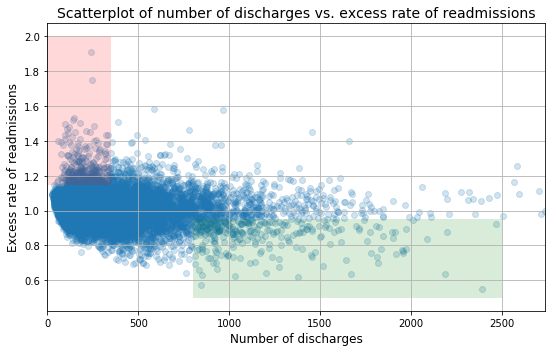

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Solution

### Reviewing the dataset

Prior to answering the questions, it is a good idea to have a quick look through the data we will be working with. 
Below we take a look at the first few rows of the dataset, the size of the dataset and the number of missing values in each column. 

In [5]:
# displaying first few rows of dataset
clean_hospital_read_df.head(7)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [6]:
# printing the size of the dataset
clean_hospital_read_df.shape

(11578, 12)

In [7]:
# displatying the number of missing values
pd.isnull(clean_hospital_read_df).sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

We note that the main columns of concern for our intended analyses is the number of discharges and the excess readmission ratio. Let's isolate these columns in a new dataframe and drop the missing values. 

In [8]:
# isolating columns
hospitals = clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges']]
hospitals = hospitals.dropna()

Now that we've further prepared the dataset, we can move on to our analyses. 

### Analysing the Preliminary Report

To check the claims made in the preliminary report, two hypothesis tests will be used to analyse the statistics section and the conclusion section respectively:
* The first test will be focused on hospitals and facilites with excess readmissions ratios greater than one; we will verify whether there is a statistically significant difference between the proportion of hospitals and facilities with less than 100 discharges and the proportion of hospitals with 1000 or more discharges.
* The second test will be focused on the conclusion that there is a significant correletion between the number of discharges and excess readmission ratios;

The hypothesis tests will be made under the assumptions that the excess rate of readmissions in a given hospital is independent of the excess rate of readmissions in other hospitals. 

### Test 1: Verifying statistical difference 
The null and alternative hypotheses are shown below:
* H<sub>0</sub> : p<sub>above_1000</sub> - p<sub>under_100</sub> = 0
* H<sub>1</sub> : p<sub>above_1000</sub> - p<sub>under_100</sub> < 0

In words: 
* The null hypothesis states that for hospitals with excess readmission ratios greater than 1, the proportion of hospitals with less than 100 discharges is equivalent to the proportion of hospitals with 1000 or more discharges.  
* The alternative hypothesis states that for hospitals with excess readmission ratios greater than 1, the proportion of hospitals with less than 100 discharges is greater than the proportion of hospitals with 1000 or more discharges.

Let's check whether the count of hospitals and facilities in each discharge category to determine whether we can apply the central limit theorem. 

In [9]:
# selecting subset of hospital dataframe 
df_under_100 = hospitals[hospitals['Number of Discharges'] < 100]
df_above_1000 = hospitals[hospitals['Number of Discharges'] > 1000]

# printing the number of hospitals or facilities in each category
print('Count of hospitals/facilities with less than 100 discharges: ' +
      str(len(df_under_100)))
print('Count of hospitals/facilities with over 1000 discharges: ' + 
      str(len(df_above_1000)))

Count of hospitals/facilities with less than 100 discharges: 1188
Count of hospitals/facilities with over 1000 discharges: 463


As the count of hospitals and facilities in each category is greater than 30, we can apply the central limit theorem. Below we compute the p-value. 

In [10]:
# calculating proportions of call backs for each race
p_under_100 = (df_under_100['Excess Readmission Ratio'] > 1).sum()/len(df_under_100)
p_above_1000 = (df_above_1000['Excess Readmission Ratio'] > 1).sum()/len(df_above_1000)

# calculating standard error assuming null hypothesis is true
SE = np.sqrt(((p_under_100/len(df_under_100))+(p_above_1000/len(df_above_1000)))) 

#calculating z-score
Z_score = (p_above_1000 - p_under_100)/SE

# calculating the p-value
p_value = st.norm.cdf(Z_score)

# defining significance level
sig_level = 0.01

# check what to print (only works since we know we need to compare results to lower tail)
if p_value < sig_level:
    print('Z-test: The p-value (' + str(p_value) + ') is less than ' + str(sig_level))
else:
    print('Z-test: The p-value (' + str(p_value) + ') is greater than ' + str(sig_level))

Z-test: The p-value (6.31576857454e-07) is less than 0.01


Based on the above results, we reject the null hypothesis; the results suggests that for hospitals and facilities with excess admission ratios, the proportion of hospitals with less than 100 discharges is greater than the proportion of hospitals over 1000 discharges. 

### Test 2: Correlation test
The null and alternative hypotheses are shown below:
* H<sub>0</sub> : $\rho$ = 0
* H<sub>1</sub> :  $\rho$ < 0

In words: 
* The null hypothesis states that there is no correlation between the excess readmission ratios and the number of discharges  
* The alternative hypothesis states that there is a negative correlation between the excess readmission ratios and the number of discharges.

Below we calculate the p-value using the t-test. 

In [11]:
# creating a line of best fit using the data  
results = st.linregress(x = hospitals['Number of Discharges'], 
                        y = hospitals['Excess Readmission Ratio'])

# extracting results
slope, intercept, r_value, p_value_2t, stderr = results

# converting the two tail test p-value to a one-tail test p-value
p_value_1t = p_value_2t/2

# check what to print (only works since we know we need to compare results to lower tail)
if p_value < sig_level:
    print('Z-test: The p-value (' + str(p_value) + ') is less than ' + str(sig_level))
else:
    print('Z-test: The p-value (' + str(p_value) + ') is greater than ' + str(sig_level))

Z-test: The p-value (6.31576857454e-07) is less than 0.01


Since, the p-value is smaller than the significance level $\alpha$, we reject the null hypothesis in favor of the alternative. There is sufficient evidence at the 1% signifiance level to conclude that there is a negative linear relationship in the population between the number of discharges and the excess readmission ratios.

Let's create this plot below:

(0, 6793)

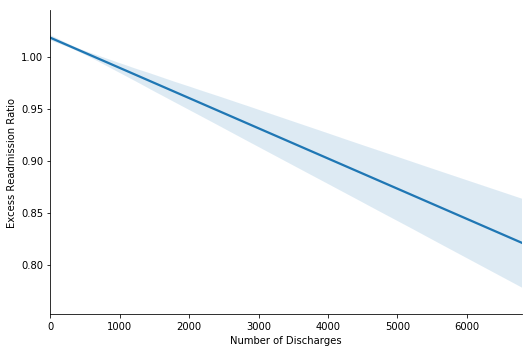

In [12]:
# code to create line of best fit 
sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio',data=hospitals,
           fit_reg=True, size = 5, aspect = 1.5, scatter = False) 
plt.xlim([0, hospitals['Number of Discharges'].max()])

To better understand the strength of the relationship in the above plot let's take a look at the r<sup>2</sup> value

In [13]:
# calculating coefficient of determination
coeff_of_det = r_value**2
print('Coefficient of determination: ' + str(coeff_of_det))

Coefficient of determination: 0.00948635940013


We see from above that the r<sup>2</sup> value is 0.0095. This means that the number of discharges only accounts for roughly 1% of the variation in the excess readmission ratios. 
    
Based on the two hypothesis tests, the conclusion is statistically correct: a greater proportion of hospitals/facilities with smaller capacities (number of discharges) tends to have excess readmission ratios greater than 1. However, it is worth noting that the policy recommendations deal with a small portion of the problem since the number of discharges acounts for 1% of the variation in excess readmission rates. Statistically speaking, it appears there is only little to gain by using the recommendations to reduce the proportion of excess readmission ratios greater than 1. 

From a practical standpoint, using the recommendations could result in fewer hospitals to regulate and significantly reduce the proportion of excess readmission ratios greater than 1. Consequently, I agree with the regulatory policy recommendations. However, I also suggest that more research should be done on developing better recommendations that are also possible to regulate.